# This notebook provides a comprehensive tutorial on utilizing emulators of both linear and non-linear matter power spectra. We will explore two illustrative examples: the first involves computing both linear and non-linear spectra for a single set of parameters, while the second entails the analysis of both spectra across a dataset of $10^5$ parameter sets.

In [1]:
import numpy as np
import cosmopower as cp
import matplotlib.pyplot as plt
import os

2023-11-16 17:39:34.159324: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!pip install SciencePlots

In [3]:
plt.style.reload_library()
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [4]:
plt.style.use(['science', 'notebook','ieee'])

## To get started, we initialize the emulators through the $\texttt{CosmoPower}$ package.
#### Notably, the spectrum emulators are characterized by units of $[\rm h/\rm Mpc]^3$, with $k$-modes expressed in $[1/\rm Mpc]$.

In [5]:
lin_emu = cp.cosmopower_NN(restore=True,
                          restore_filename='/Users/osx/Documents/my_emulators/DS_linear_cp_NN_S8',
                         )

nl_emu = cp.cosmopower_NN(restore=True,
                          restore_filename='/Users/osx/Documents/my_emulators/DS_nonlinear_cp_NN_S8',
                         )

In [6]:
k_modes = nl_emu.modes

## Let's explore the input parameters associated with each emulator.

In [7]:
lin_emu.parameters   #The parameters names are not in order for inputting.

ListWrapper(['w', 'S_8', 'omega_cdm', 'm_nu', 'A', 'z', 'omega_b', 'n_s', 'h'])

In [8]:
nl_emu.parameters    #There parameters names are not in order for inputting.

ListWrapper(['w', 'S_8', 'omega_cdm', 'm_nu', 'A', 'z', 'omega_b', 'n_s', 'h'])

### Important to mention, the order of the input parameters of emulators must be consistent to the training stage!

# 1) A single parameters set
### We create a dictionary that is now organized to align with the input parameters for emulator.

In [9]:
params_single = {'omega_b': [0.02242],
                'omega_cdm': [0.11933],
                'h': [67.66/100.0],
                'n_s': [0.9665],
                'S_8': [0.8102],
                'm_nu': [0.0],
                'w': [-1.0],
                'A': [0],
                'z': [0]
                }

## Easily we can now pass the orderly-arranged dictionary as input to the emulators.

In [10]:
Pk_lin = lin_emu.predictions_np(params_single) #This is in log10(Pk_lin)

In [11]:
Pk_nl = nl_emu.predictions_np(params_single) #This is in log10(Pk_nl)

## For a visual representation, let's generate plots for both spectra.

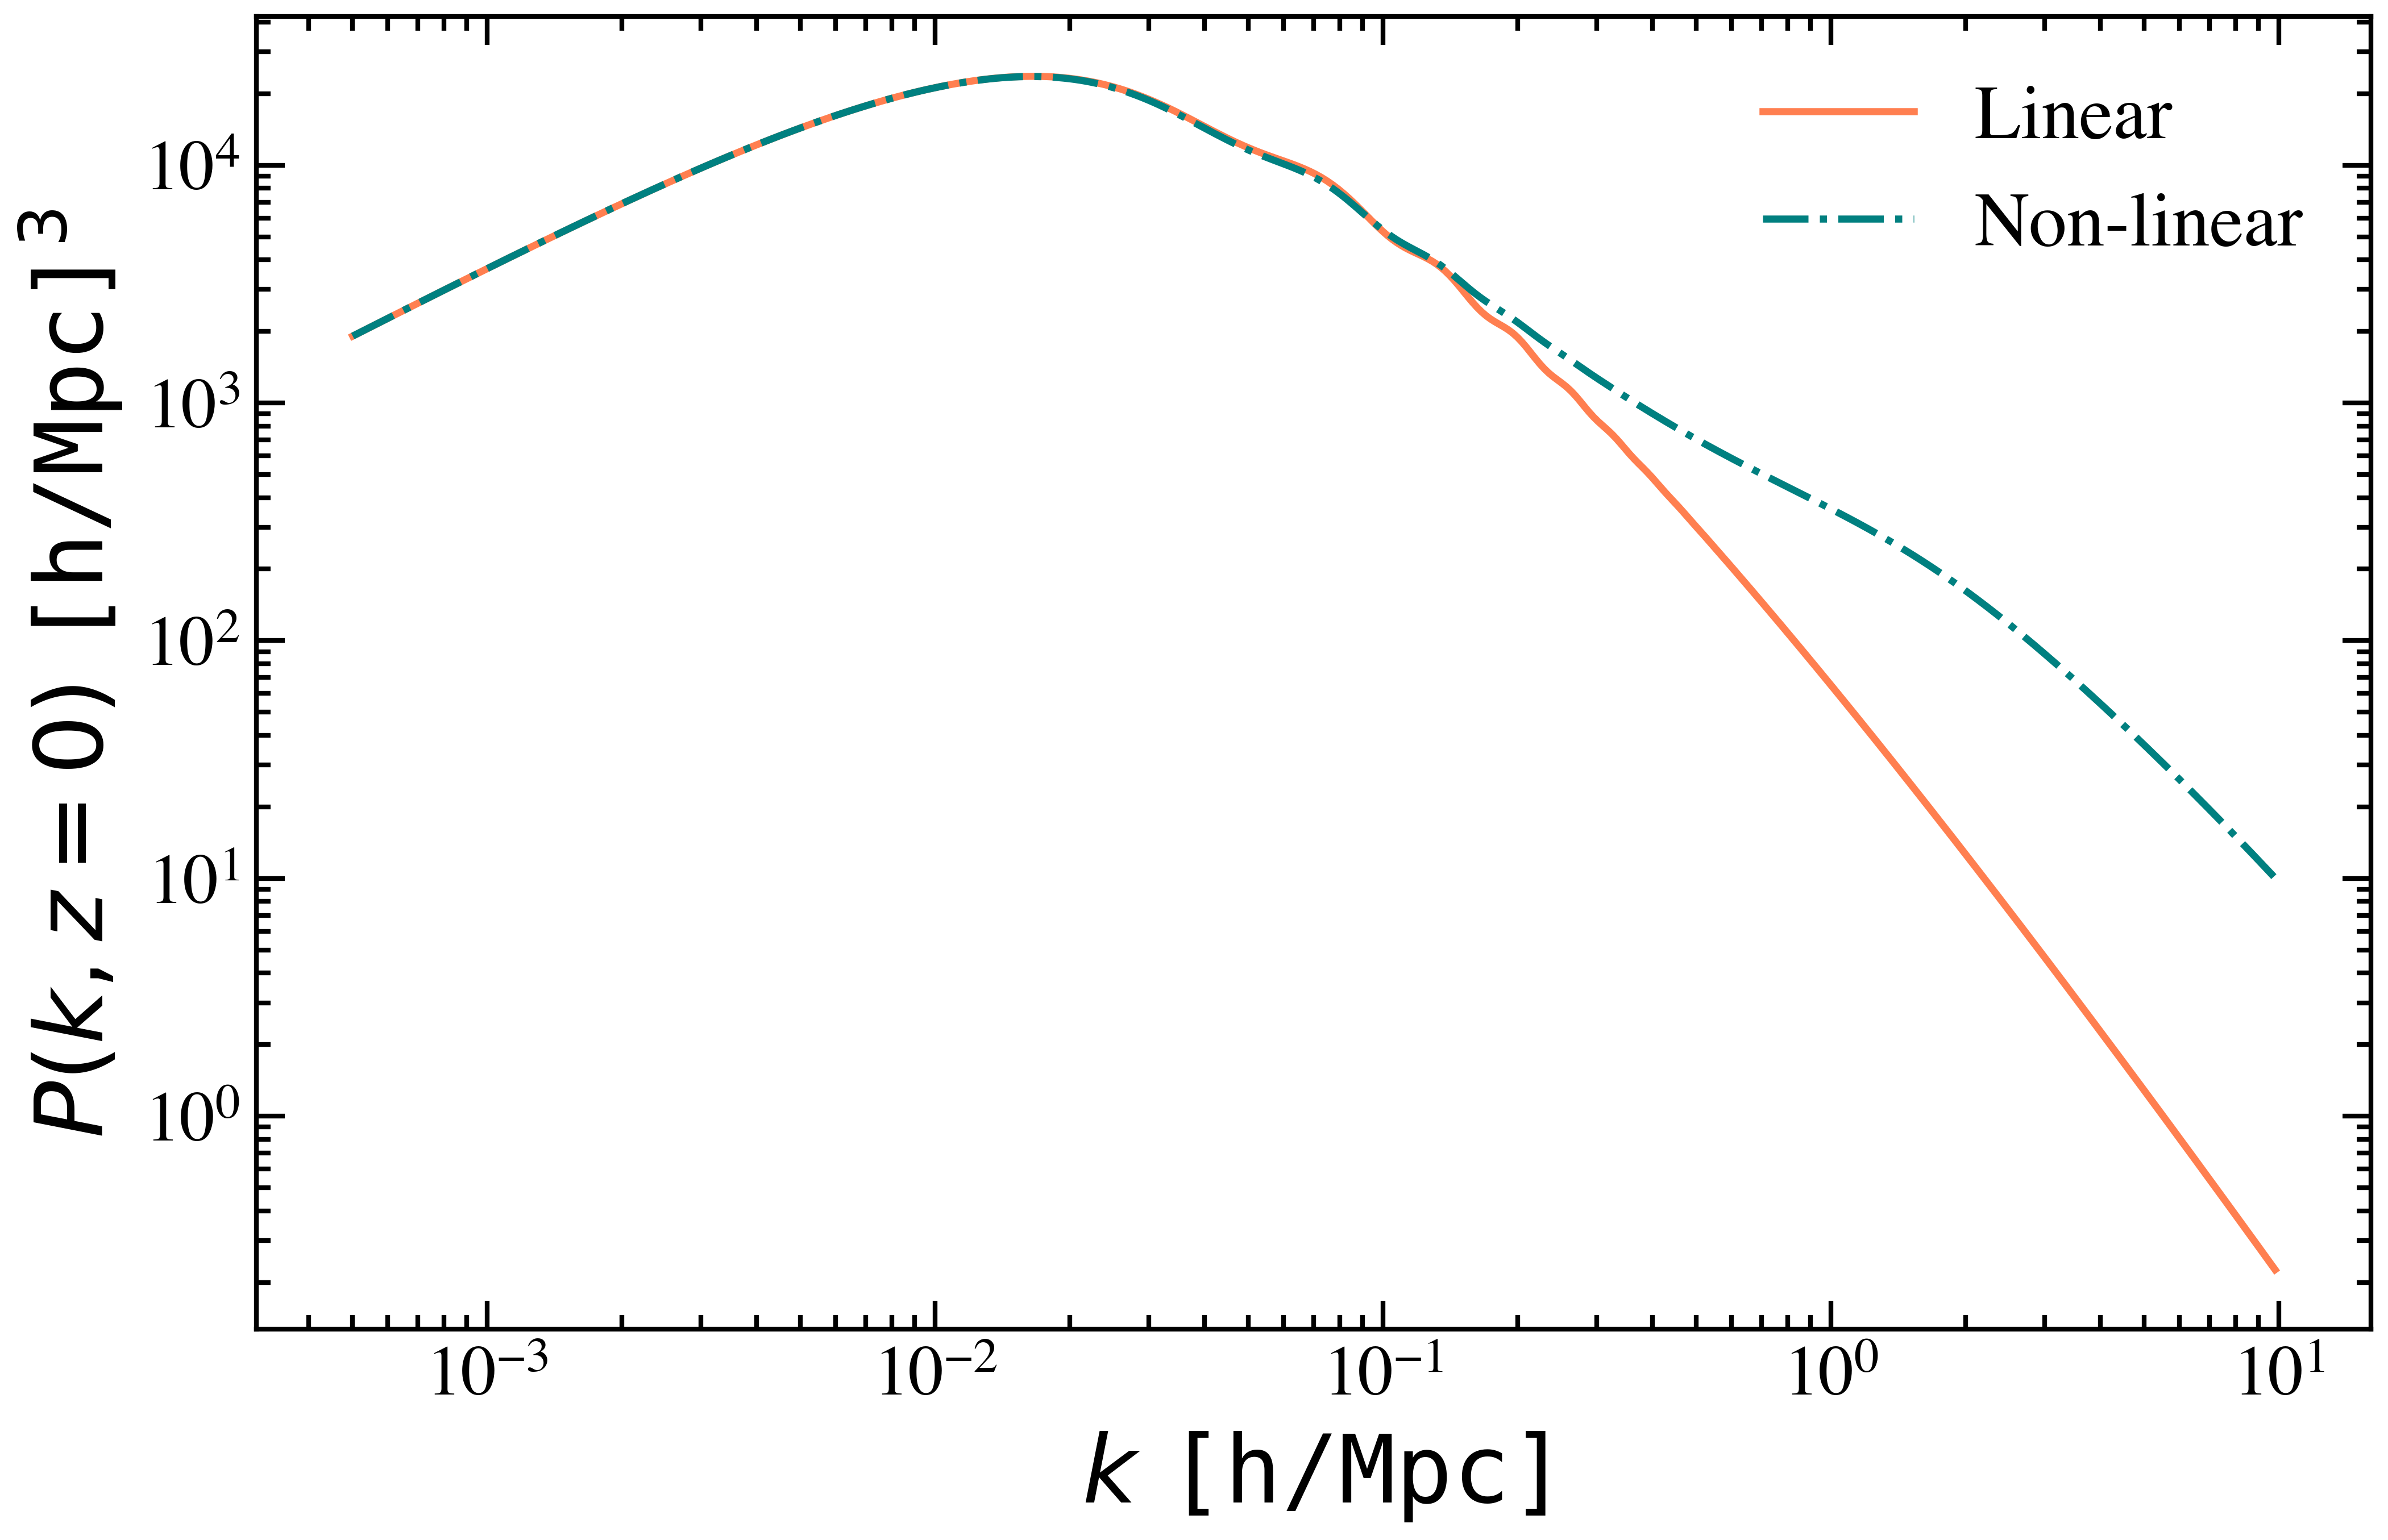

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharex = False, sharey= True)

ax.plot(k_modes, 10**Pk_lin[0], '-', color='coral', lw=1.5, label= r'Linear')
ax.plot(k_modes, 10**Pk_nl[0], '-.', color='teal', lw=1.5, label= r'Non-linear')
ax.set_ylabel(r"$P(k, z=0) \ \mathtt{[h/Mpc]}^3$",fontsize=20)
ax.set_xlabel(r"$k \ \mathtt{[h/Mpc]}$",fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend()
plt.show()

# 2) A bunch of parameters set

### Now, we'll proceed to emulate 100,000 spectra and record the computational timing for the calculations.
### Given the following dictionary:  

In [13]:
N_params = 100000

params_set = {'omega_b': np.linspace(0.01865, 0.02625, N_params),
              'omega_cdm': np.linspace(0.1, 0.255, N_params),
              'h': np.linspace(0.64, 0.82, N_params),
              'n_s': np.linspace(0.84, 1.1, N_params),
              'S_8': np.linspace(0.6, 0.9, N_params),
              'm_nu': np.linspace(0.0, 0.2, N_params),
              'w': np.linspace(-1.3, -0.7, N_params),
              'A': np.linspace(-10.0, 10.0, N_params),
              'z': np.linspace(0.0, 5.0, N_params)
             }

In [14]:
%%time
Pk_lin_array = lin_emu.predictions_np(params_set) #log10(Pk_lin)

CPU times: user 15.4 s, sys: 9.85 s, total: 25.2 s
Wall time: 22.4 s


In [15]:
np.shape(Pk_lin_array)

(100000, 372)

In [16]:
%%time
Pk_nl_array = nl_emu.predictions_np(params_set) #log10(Pk_nl)

CPU times: user 17.2 s, sys: 10.2 s, total: 27.3 s
Wall time: 20.5 s


In [17]:
np.shape(Pk_nl_array)

(100000, 372)

### Remarkably, each spectrum emulation has been full computed in an impressive ~13 seconds!!!

## Finally, let's visualize a subset of 1000 spectra with a plot.

In [18]:
import matplotlib.colorbar

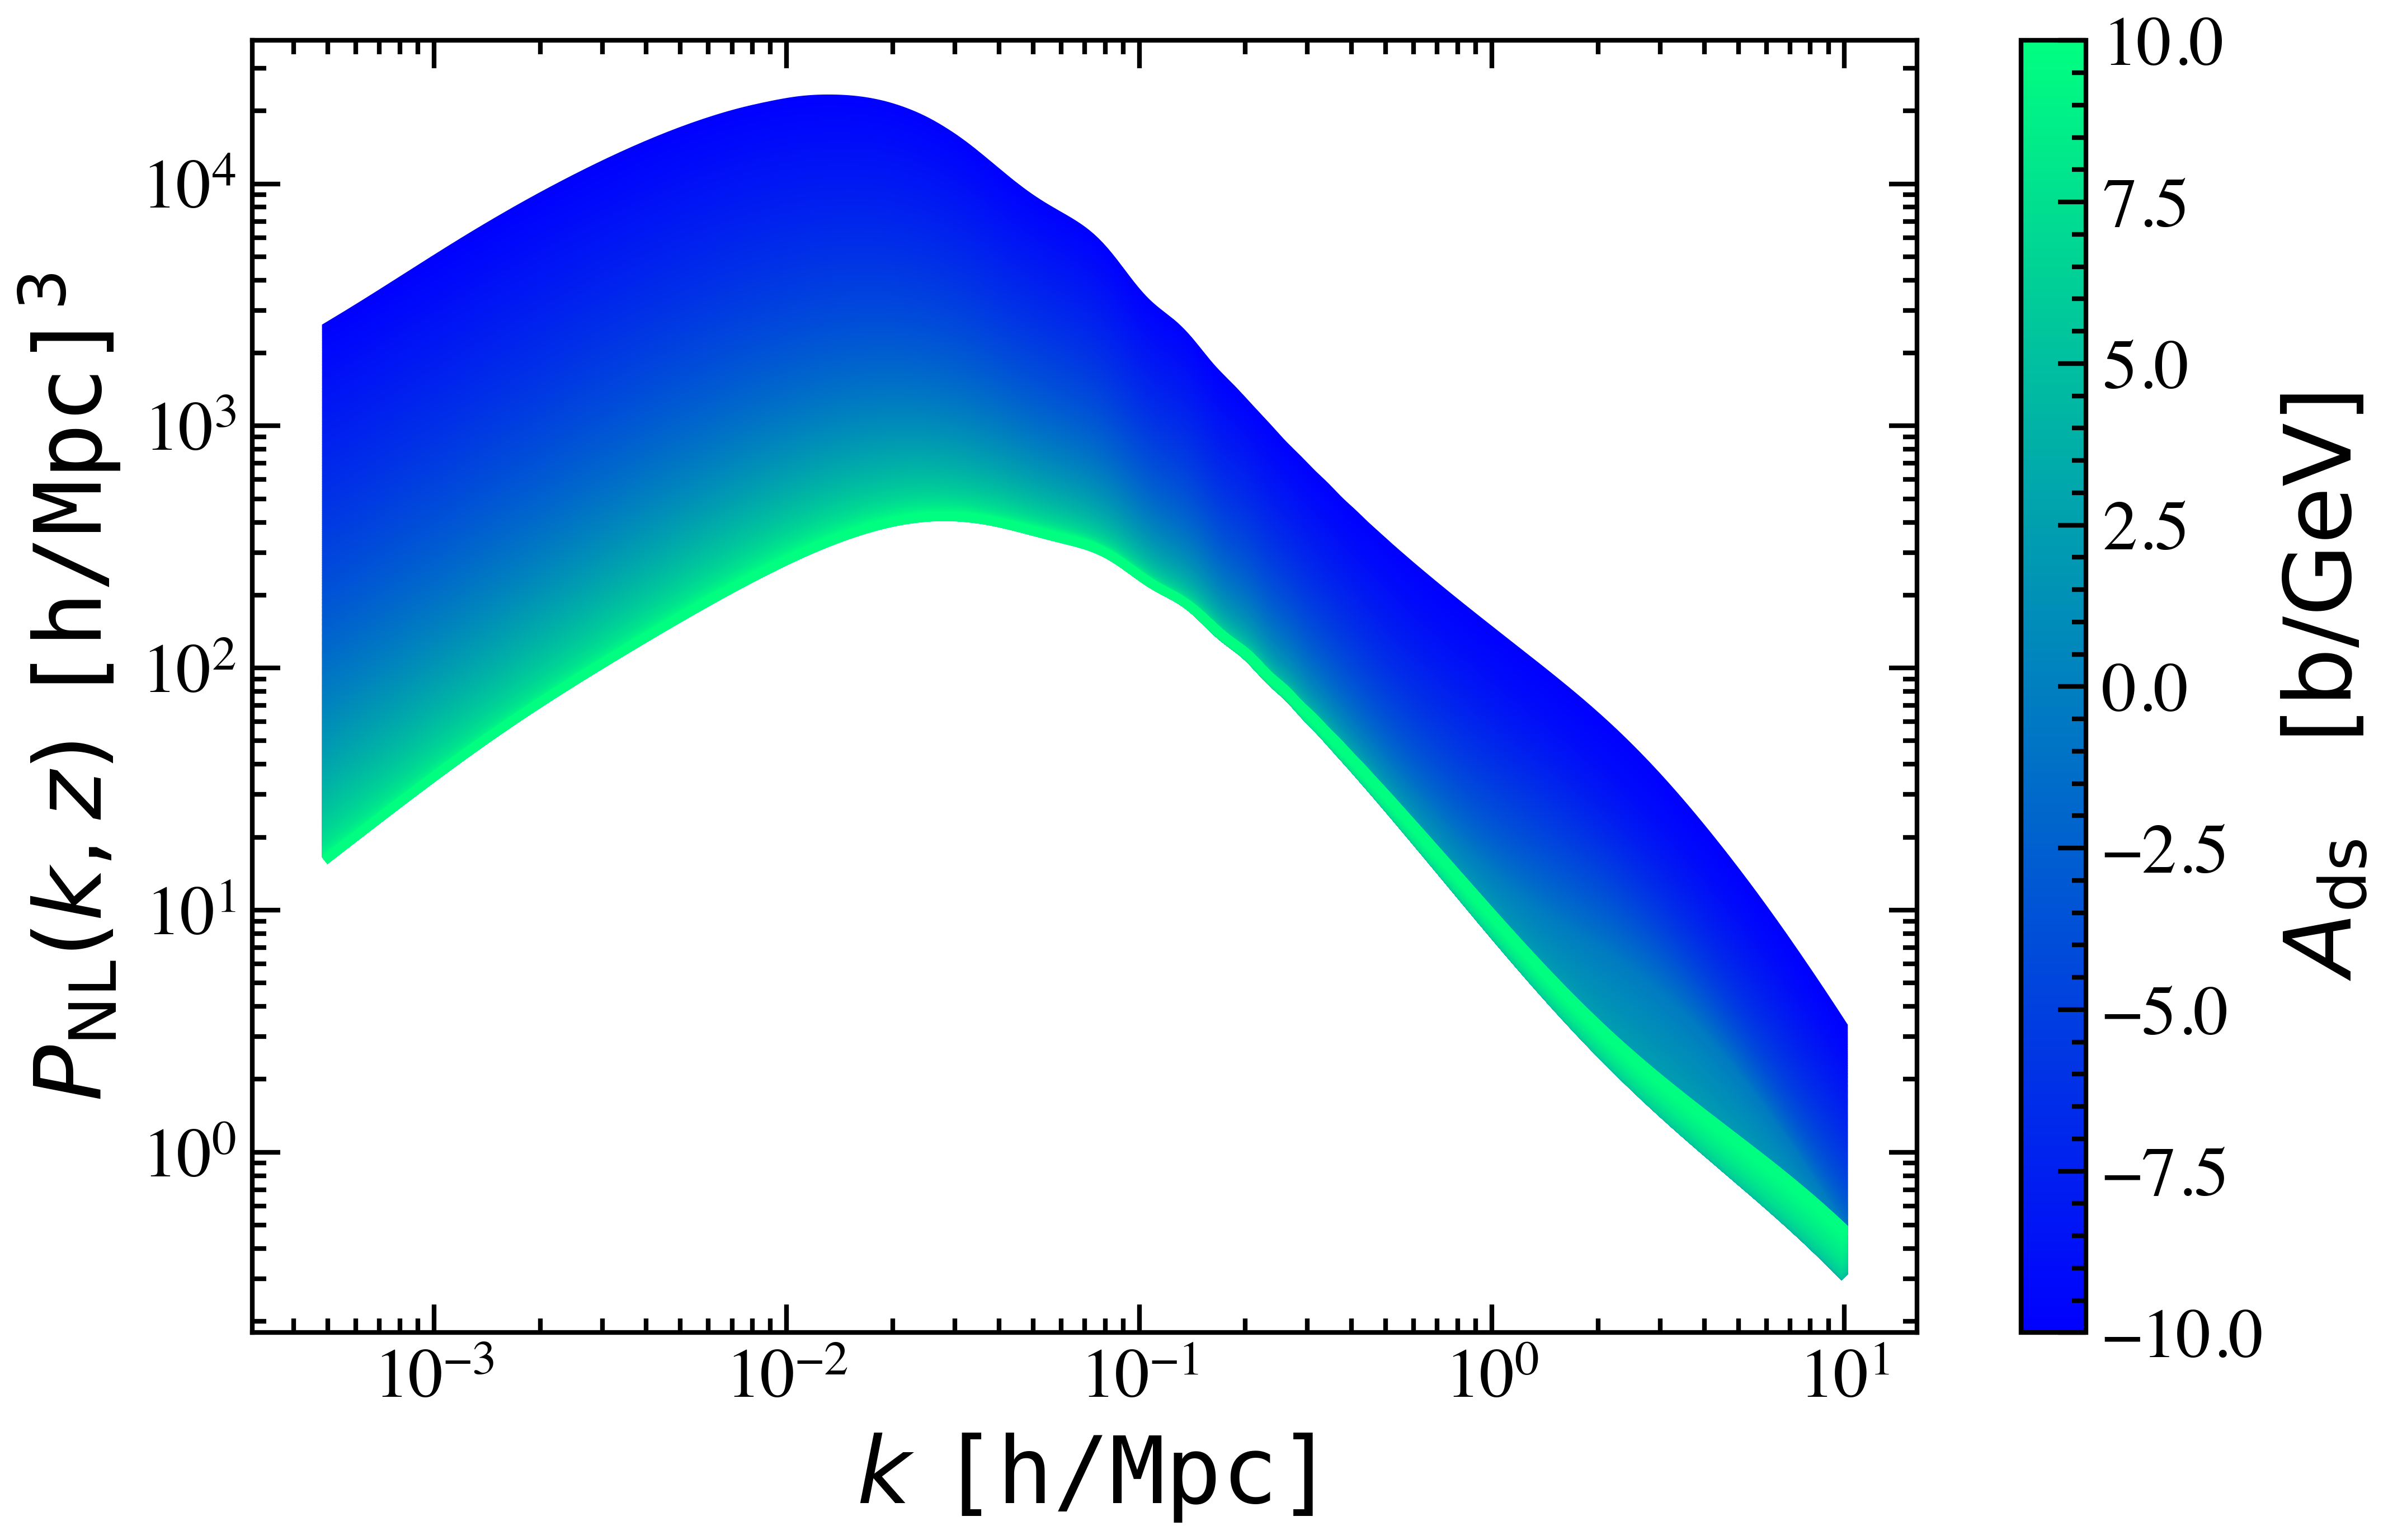

In [19]:
cmap = plt.get_cmap("winter")
  
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharex = False, sharey= True)

for param_name, ls, param in [("$A_{\\rm ds}  \quad [ \\rm b/GeV]$", "-", params_set['A'])]:
    cb_ax = matplotlib.colorbar.make_axes(ax, location='right')
    norm = matplotlib.colors.Normalize(vmin=param[0], vmax=param[-1])
    cb1 = matplotlib.colorbar.ColorbarBase(cb_ax[0], cmap=cmap, norm=norm, **cb_ax[1])

    cb1.set_label(param_name,fontsize=20)
    cb1.ax.tick_params(labelsize=15)
    for ii in range(1000):
        jj = ii*100
        _ = ax.plot(k_modes, (10**Pk_nl_array[jj]), 
                                ls=ls, c=cmap(jj/len(param)))
        
ax.set_ylabel(r"$P_{\rm NL}(k, z) \ \mathtt{[h/Mpc]}^3$",fontsize=20)
ax.set_xlabel(r"$k \ \mathtt{[h/Mpc]}$",fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.show()

#### End of the notebook.